In [5]:
from langchain_ollama import OllamaLLM
from langchain_ollama import OllamaEmbeddings

# 使用 ollama 的模型
llm_model = OllamaLLM(
    base_url='http://dandelion-ollama-1:11434', 
    model="llama3.1:8b"
)

# 使用 ollama 的 embedding 模型
embeddings_model = OllamaEmbeddings(
    base_url='http://dandelion-ollama-1:11434', 
    model="nomic-embed-text"
)


In [7]:
response = llm_model.invoke("簡單介紹 Python")
print(response)



**Python**

Python 是一種高級、通用的程式設計語言，廣泛用於網路應用程式開發、科學計算、資料分析、機器學習等領域。

**優點**

*   **簡潔易懂**: Python 的敘述式設計使得程式碼更簡短、清晰和可讀性高。
*   **快速開發**: Python 的執行效率很高，能夠達到 Java 或 C++ 的 3-5 倍之快。
*   **跨平台**: 可在 Windows、MacOS 和 Linux 等多個操作系統上運行。

**應用範圍**

*   **網路應用程式開發**: Django、Flask 等框架，快速建立 Web 應用程式。
*   **科學計算與數據分析**: NumPy、Pandas 等庫，為科學研究和資料分析提供強大的工具。
*   **機器學習與人工智慧**: TensorFlow、Keras 等框架，以及 Scikit-learn 等庫，實現深度學習和機器學習功能。

**基本語法**

Python 的程式碼以 `indent` (縮進) 表示不同的區塊：

```python
def 函數名(參數):
    # 程式碼
```

使用 `print()` 函數輸出值：

```python
print("Hello, world!")
```

**快速入門**

1.  安裝 Python：從官方網站下載最新版的 Python。
2.  運行 Python：在命令提示符中輸入 `python` 啟動 Python 解釋器。
3.  輸入程式碼：通過 `print()` 函數輸出值。

**常見函數**

| 函數名 | 說明 |
| --- | --- |
| `print()` | 輸出值 |
| `len()` | 取得清單或字典中的項目數 |
| `range()` | 產生連續的整數序列 |

這是 Python 的簡短介紹。更多內容請參考 [Python 官方文件](https://docs.python.org/3/) 以及相關教學課程和書籍。


In [8]:
embedding_vector = embeddings_model.embed_query("測試句子")
print(embedding_vector[:5])  # 印出前 5 維

[0.00941933, 0.03345217, -0.1362048, 0.020990951, -0.008507447]


In [10]:
print(embedding_vector)

[0.00941933, 0.03345217, -0.1362048, 0.020990951, -0.008507447, 0.008905827, 0.061648227, -0.018133502, -0.046490427, -0.03390527, -0.07705288, 0.0033745233, 0.07920442, -0.012554638, 0.0102359615, -0.062938854, -0.045745417, -0.039241053, -0.056629397, 0.115172476, -0.01903001, 0.051656146, 0.0064373743, 0.0030564505, 0.12667382, -0.032434214, 0.04500247, 0.0660065, 0.014362318, -0.013080743, 0.046927363, -0.0015232723, -0.039114628, 0.011826932, -0.0047403164, -0.050544232, 0.053381007, 0.011415157, 0.021182144, 0.036006335, -0.0033273434, 0.049460743, 0.029451873, -0.008524451, 0.059044376, -0.024582196, 0.025675844, 0.074763596, 0.053573776, -0.044437733, 0.00015344852, 0.04332824, 0.035791814, 0.0026605013, 0.093662046, 0.082367875, 0.030655554, -0.03643191, 0.013505756, -0.037229992, 0.03270598, 0.08668014, -0.031865712, 0.0104987305, 0.039264187, -0.05473592, -0.0138812065, 0.059214342, -0.024715979, -0.03508683, 0.058657236, -0.02283956, 0.035562977, 0.03300983, 0.0027971638, -

## 相似度分數代表？

| score         | 代表        |
| ---------- | ----------- |
| 0.0        | 完全相同       |
| 0.1 ~ 0.3  | 高度相關       |
| 0.4 ~ 0.6  | 中度相關       |
| 0.7 ~ 1.0  | 低度相關 / 幾乎無關 |


In [13]:
from langchain_ollama import OllamaEmbeddings
import numpy as np

# ªì©l¤Æ´O¤J¼Ò«¬
# embeddings_model = OllamaEmbeddings(model="snowflake-arctic-embed:335m")
embeddings_model = OllamaEmbeddings(
    base_url='http://dandelion-ollama-1:11434', 
    model="nomic-embed-text",
    # model="nomic-embed-text"
)
# «Ý´úµü·J
words = ["小王子", "狐狸", "羊", "玫瑰"]
vectors = {}

# Àò¨ú¨C­Óµüªº¦V¶q
for word in words:
    vec = embeddings_model.embed_query(word)
    vectors[word] = np.array(vec)

# ¾l©¶¬Û¦ü«×¨ç¦¡
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# ¨â¨â­pºâ
print("--------------------")
print(f"Embedding Model: {embeddings_model.model}")
print("--------------------")
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        w1, w2 = words[i], words[j]
        sim = cosine_similarity(vectors[w1], vectors[w2])
        print(f"相似度： {w1} ? {w2} = {sim:.4f} ({sim*100:.2f}%)")


--------------------
Embedding Model: nomic-embed-text
--------------------
相似度： 小王子 ? 狐狸 = 0.6061 (60.61%)
相似度： 小王子 ? 羊 = 0.5777 (57.77%)
相似度： 小王子 ? 玫瑰 = 0.6061 (60.61%)
相似度： 狐狸 ? 羊 = 0.9597 (95.97%)
相似度： 狐狸 ? 玫瑰 = 1.0000 (100.00%)
相似度： 羊 ? 玫瑰 = 0.9597 (95.97%)


In [18]:
!apt-get install fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 78 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 10s (5908 kB/s)                                             
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 14501 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...


In [2]:
import matplotlib.font_manager as fm

for font in sorted([f.name for f in fm.fontManager.ttflist]):
    if "Noto" in font or "Sans" in font or "Fallback" in font:
        print(font)
    print(font)

Abyssinica SIL
Ani
AnjaliOldLipi
Chandas
DejaVu Math TeX Gyre
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
Dhurjati
Droid Sans Fallback
Droid Sans Fallback
Dyuthi
FreeMono
FreeMono
FreeMono
FreeMono
FreeSans
FreeSans
FreeSans
FreeSans
FreeSans


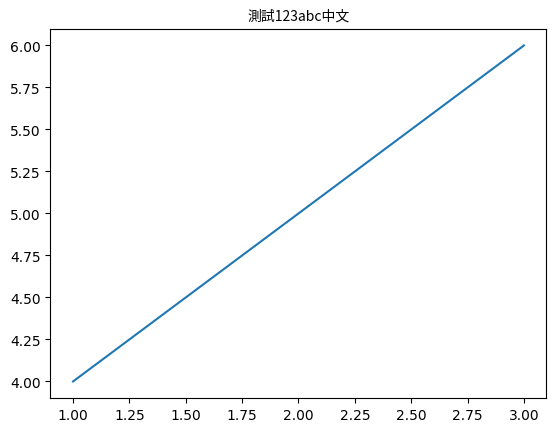

In [10]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)

plt.figure()
plt.title('測試123abc中文', fontproperties=font_prop)
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [11]:
from langchain_ollama import OllamaEmbeddings
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [13]:
# Initialize embedding model
embeddings_model = OllamaEmbeddings(
    base_url='http://dandelion-ollama-1:11434', 
    model="bge-m3:567m",
    # model="snowflake-arctic-embed:335m",
    # model="snowflake-arctic-embed:137m",
    # model="nomic-embed-text"
)

# Test words
words = ["小王子", "狐狸", "羊", "玫瑰花", "茉莉花", "沙漠"]
# words = ["The Little Prince", "Fox", "Sheep", "Rose", "Pilot", "Desert"]
vectors = []

# Get embeddings
for word in words:
    vec = embeddings_model.embed_query(word)
    vectors.append(np.array(vec))

# 1?? Compute similarity matrix
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

sim_matrix = np.zeros((len(vectors), len(vectors)))

for i in range(len(vectors)):
    for j in range(len(vectors)):
        sim_matrix[i, j] = cosine_similarity(vectors[i], vectors[j])



### model="bge-m3:567m"

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 29579 (\N{CJK UNIFIED IDEOGRAPH-738B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 29392 (\N{CJK UNIFIED IDEOGRAPH-72D0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 29432 (\N{CJK UNIFIED IDEOGRAPH-72F8}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 32650 (\N{CJK UNIFIED IDEOGRAPH-7F8A}) missing from fon

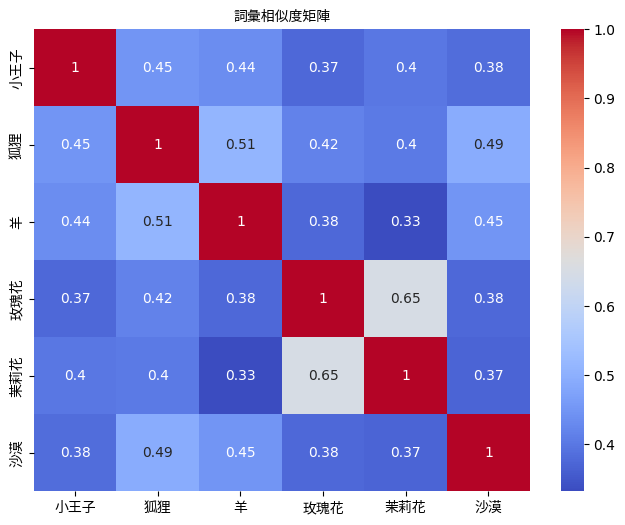

In [19]:
# Plot similarity heatmap
plt.figure(figsize=(8, 6))

ax = sns.heatmap(
    sim_matrix,
    xticklabels=words,
    yticklabels=words,
    annot=True,
    cmap='coolwarm'
)

plt.title('詞彙相似度矩陣', fontproperties=font_prop)

# 設定 X / Y 軸字型
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)

plt.show()

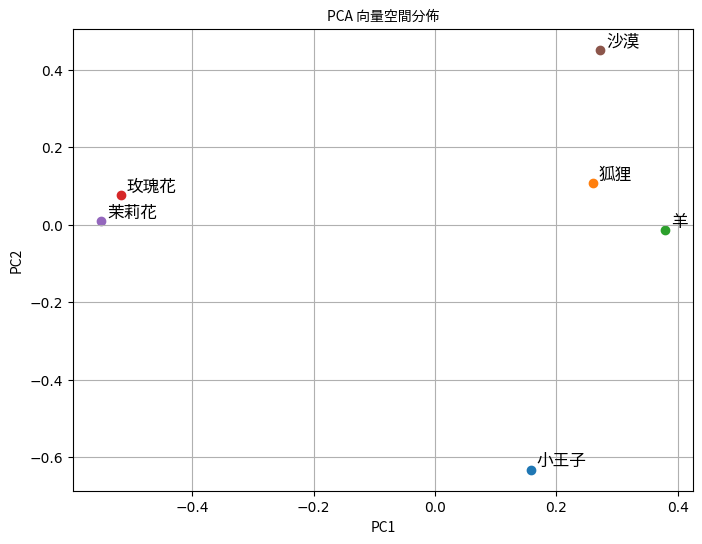

In [22]:
# 2 PCA visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, word, fontsize=12, fontproperties=font_prop)

plt.title('PCA 向量空間分佈', fontproperties=font_prop)
plt.xlabel('PC1', fontproperties=font_prop)
plt.ylabel('PC2', fontproperties=font_prop)
plt.grid(True)
plt.show()


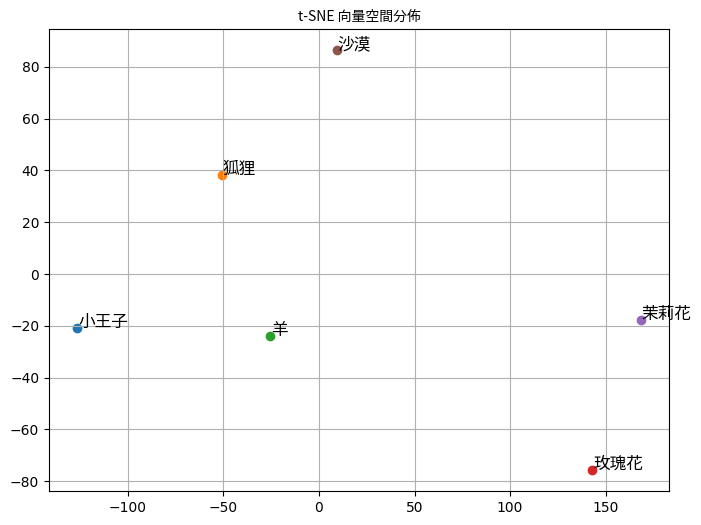

In [23]:
# 3 TSNE visualization
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
tsne_result = tsne.fit_transform(np.array(vectors))
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1])
    plt.text(tsne_result[i, 0]+0.5, tsne_result[i, 1]+0.5, word, fontsize=12, fontproperties=font_prop)

plt.title('t-SNE 向量空間分佈', fontproperties=font_prop)
plt.grid(True)
plt.show()

### model="nomic-embed-text"

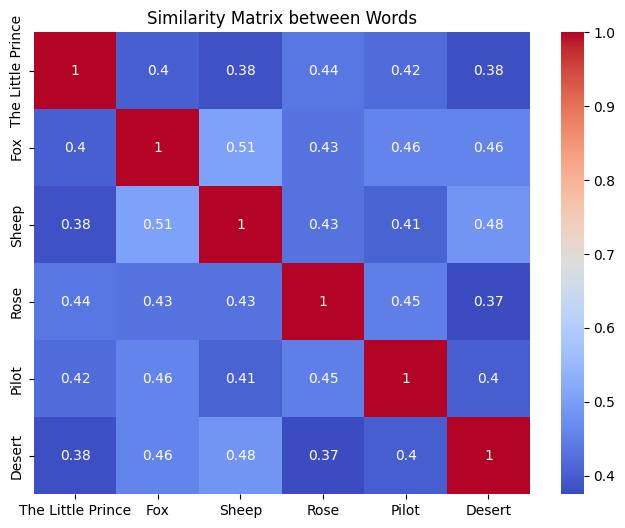

In [2]:
# Plot similarity heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, xticklabels=words, yticklabels=words, annot=True, cmap='coolwarm')
plt.title('Similarity Matrix between Words')
plt.show()

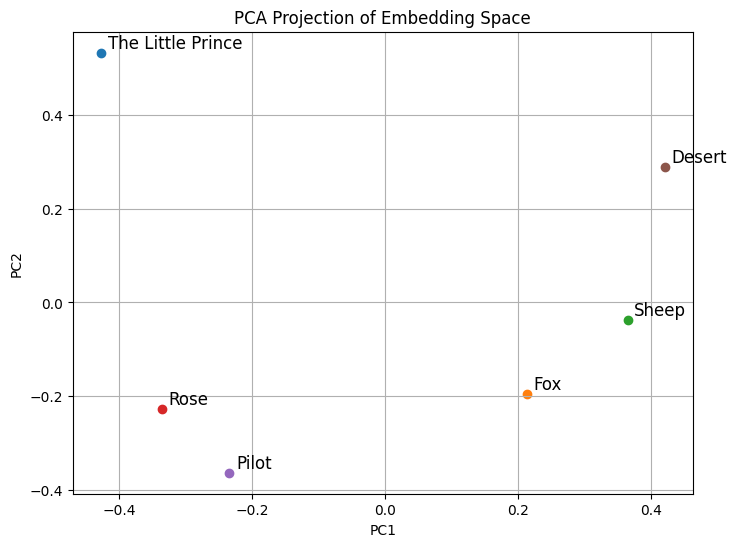

In [3]:
# 2 PCA visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, word, fontsize=12)
plt.title('PCA Projection of Embedding Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

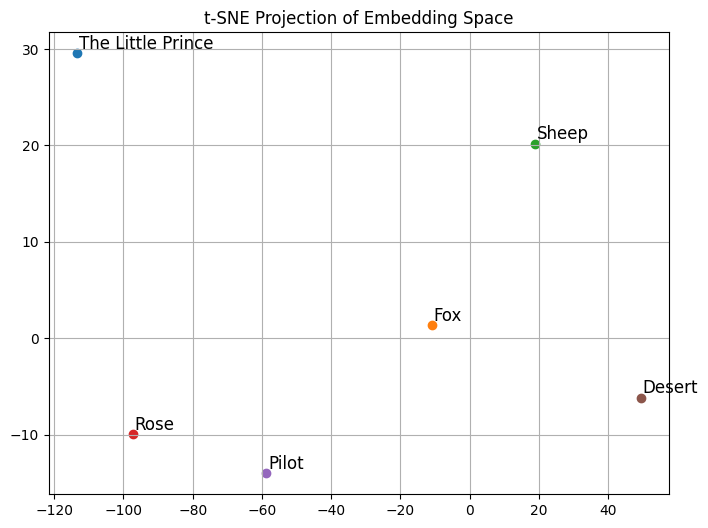

In [4]:
# 3 TSNE visualization
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
tsne_result = tsne.fit_transform(np.array(vectors))


plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1])
    plt.text(tsne_result[i, 0]+0.5, tsne_result[i, 1]+0.5, word, fontsize=12)
plt.title('t-SNE Projection of Embedding Space')
plt.grid(True)
plt.show()

### model="snowflake-arctic-embed:137m"
context = 2K

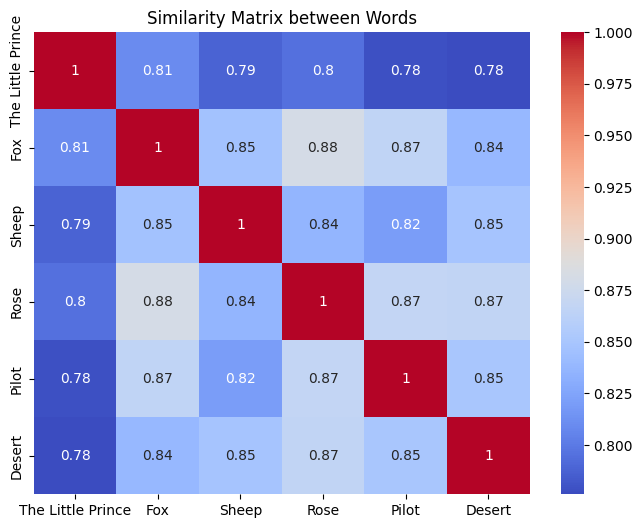

In [8]:
# Plot similarity heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, xticklabels=words, yticklabels=words, annot=True, cmap='coolwarm')
plt.title('Similarity Matrix between Words')
plt.show()

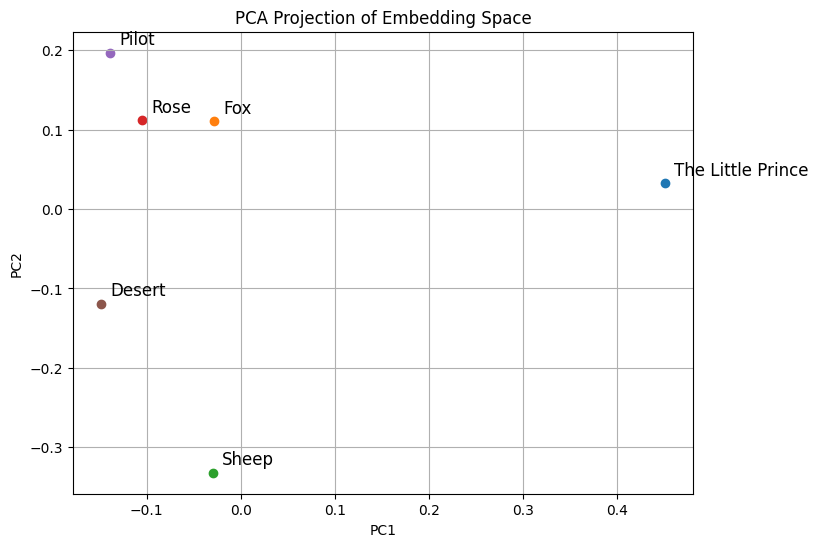

In [9]:
# 2 PCA visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, word, fontsize=12)
plt.title('PCA Projection of Embedding Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

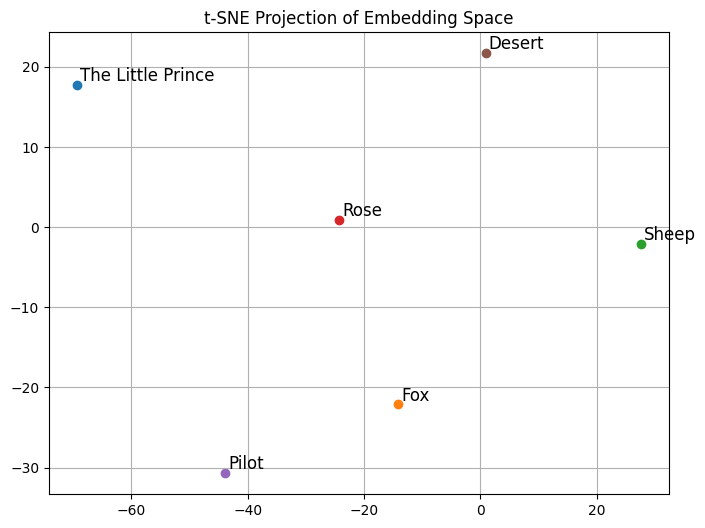

In [10]:
# 3 TSNE visualization
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
tsne_result = tsne.fit_transform(np.array(vectors))


plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1])
    plt.text(tsne_result[i, 0]+0.5, tsne_result[i, 1]+0.5, word, fontsize=12)
plt.title('t-SNE Projection of Embedding Space')
plt.grid(True)
plt.show()

### model="snowflake-arctic-embed:335m"
context = 512

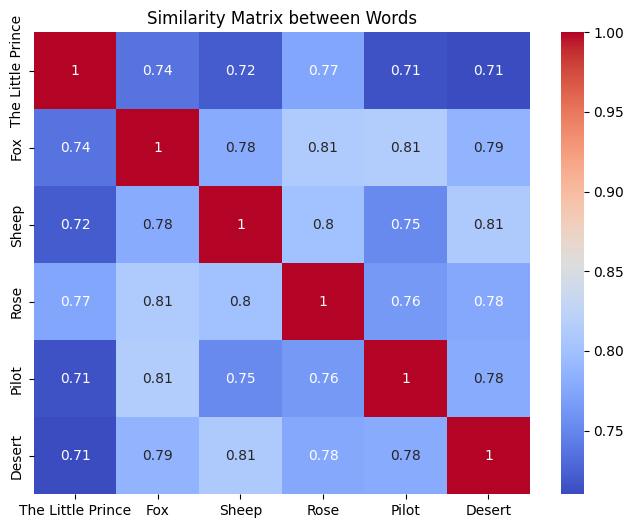

In [12]:
# Plot similarity heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, xticklabels=words, yticklabels=words, annot=True, cmap='coolwarm')
plt.title('Similarity Matrix between Words')
plt.show()

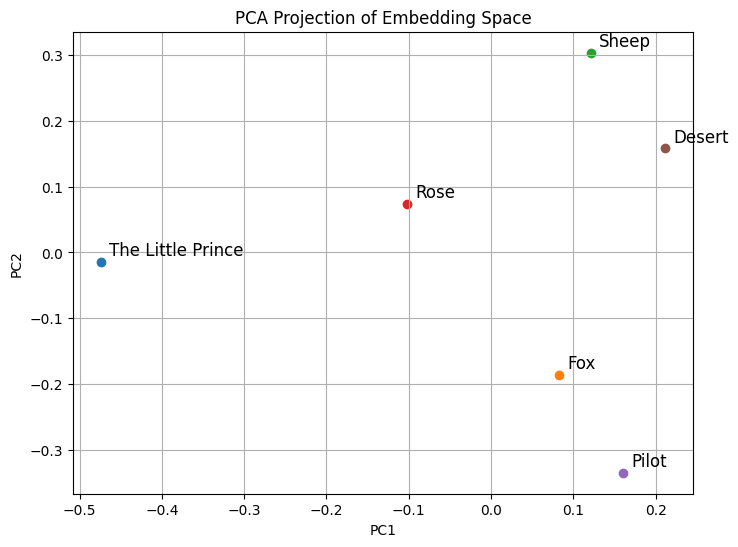

In [13]:
# 2 PCA visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, word, fontsize=12)
plt.title('PCA Projection of Embedding Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

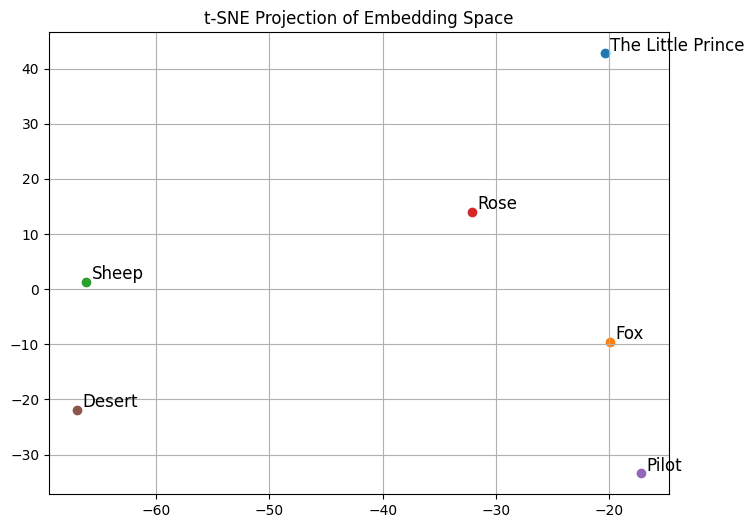

In [14]:
# 3 TSNE visualization
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
tsne_result = tsne.fit_transform(np.array(vectors))


plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1])
    plt.text(tsne_result[i, 0]+0.5, tsne_result[i, 1]+0.5, word, fontsize=12)
plt.title('t-SNE Projection of Embedding Space')
plt.grid(True)
plt.show()

In [28]:
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_ollama import OllamaEmbeddings
import numpy as np

embeddings_model = OllamaEmbeddings(
    base_url='http://dandelion-ollama-1:11434', 
    model="bge-m3:567m",
)

loader = PyPDFLoader('./data/PDF_file.pdf')
docs = loader.load_and_split()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=256, chunk_overlap=50)
documents = text_splitter.split_documents(docs)

doc_vectors = []
for doc in documents:
    vec = np.array(embeddings_model.embed_query(doc.page_content))
    doc_vectors.append((doc.page_content, vec))

vec_prince = np.array(embeddings_model.embed_query("小王子"))
vec_crown = np.array(embeddings_model.embed_query("皇冠"))
vec_result = vec_prince - vec_crown

# 相似度函式
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# 比對並排序
scored_docs = []
for content, vec in doc_vectors:
    score = cosine_similarity(vec_result, vec)
    scored_docs.append((content, score))

# 相似度高的排在前
scored_docs.sort(key=lambda x: -x[1])

# 輸出前5名
print("\n最接近的段落：\n")
for i in range(5):
    print(f"[{i+1}] 相似度 {scored_docs[i][1]:.4f}")
    print(scored_docs[i][0])  # ¦L«e200¦r
    print("---")



最接近的段落：

[1] 相似度 0.2827
“為什么問這個呢？” 
 
    “因為我那里地方非常小…” 
 
    “我給你畫的是一只很小的小羊，地方小也夠喂養它的。” 
 
    他把腦袋靠近這張畫。 
 
    “并不象你說的那么小…瞧！它睡著了…” 
 
    就這樣，我認識了小王子。 
 
 
                                III 
 
    我費了好長時間才弄清楚他是從哪里來的。小王子向我提出了很多問題，可
---
[2] 相似度 0.2491
子看待！但是，如果你對他們說：“小王子來自的星球就是小行星 B612 ”，那
么他們就十分信服，他們就不會提出一大堆問題來和你糾纏。他們就是這樣的。
小孩子們對大人們應該寬厚些，不要埋怨他們。 
 
    當然，對我們懂得生活的人來說，我們才不在乎那些編號呢！我真愿意象講 
神話那樣來開始這個故事，我真想這樣說： 
 
    “從前呀，有一個小王子，他住在一個和他身體差不多大的星球上，他希望 
有一個朋友…”對懂得生活的人來說，這樣說就顯得真實。
---
[3] 相似度 0.2467
讓他費勁。我對他說： 
 
    “讓我來干吧。這活對你太重了。” 
 
    我慢慢地把水桶提到井欄上。我把它穩穩地放在那里。我的耳朵里還響著轆 
轤的歌聲。依然還在晃蕩的水面上，我看見太陽的影子在跳動。 
 
    “我正需要喝這種水。”小王子說：“給我喝點…” 
 
    這時我才明白了他所要尋找的是什么！ 
 
    我把水桶提到他的嘴邊。他閉著眼睛喝水。就象節日一般舒適愉快。這水遠 
不只是一種飲料，它是披星戴月走了許多路才找到的，是在轆轤的歌聲中，經過
---
[4] 相似度 0.2463
這篇文字是錄自商務印書館出版的一本法漢對照的《小王子》的中文部分。 
個別字句有所改動，原文中有大量精美的插圖，可是商務版只有几副。如果有插 
圖，可以制作一份 WWW 版的《小王子》主頁，那就更好了。 
 
    《小王子》 是他作品中比較獨特的一篇，也是最著名的一篇。是一本“為大 
人們寫的童話故事”。我很喜歡它，從小學看到大學。確實，它給大人們看的， 
理解它必須是“大人”才行。可是，我多么希望我還是一個小王子一樣的孩子…
---
[5] 相似度 0.2432


In [25]:
from langchain_ollama import OllamaEmbeddings
import numpy as np

embeddings_model = OllamaEmbeddings(
    base_url='http://dandelion-ollama-1:11434', 
    model="bge-m3:567m",
)
# 向量化
vec_prince = np.array(embeddings_model.embed_query("小王子"))
vec_crown = np.array(embeddings_model.embed_query("皇冠"))

# 計算結果向量
vec_result = vec_prince - vec_crown

candidates = ["男孩", "孩子", "王子", "冒險家", "探險家", "小孩"]

# 計算結果向量與相似度
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

best_match = None
best_score = -1

for word in candidates:
    vec_word = np.array(embeddings_model.embed_query(word))
    score = cosine_similarity(vec_result, vec_word)
    print(f"{word} 相似度: {score:.4f}")
    if score > best_score:
        best_match = word
        best_score = score

print(f"\n最接近的詞是：{best_match} 相似度 {best_score:.4f}")


男孩 相似度: 0.2561
孩子 相似度: 0.2014
王子 相似度: 0.3307
冒險家 相似度: 0.0561
探險家 相似度: 0.0437
小孩 相似度: 0.2124

?? 最接近的詞是：王子 相似度 0.3307¡^
